In [1]:
import sys
sys.path.append("../")

import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import argparse
from wldo_regressor.model import Model
from dataset_dogs.base_dataset import AnimalDataset
from global_utils.helpers.visualize import Visualizer
import global_utils.config as config
from torch.utils.data import DataLoader

c:\Users\CHAMP-3000\anaconda3\envs\wldo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define command-line arguments
parser = argparse.ArgumentParser()
parser.add_argument('--output_dir', default='../data/results', help='Where to export the SMAL fits')
# parser.add_argument('--checkpoint', default='../data/pretrained/model_epoch_00000999.pth', help='Path to network checkpoint')
parser.add_argument('--checkpoint', default='../data/pretrained/3501_00034_betas_v4.pth', help='Path to network checkpoint')
parser.add_argument('--dataset', default='animal3d', choices=['stanford', 'animal_pose'], help='Choose evaluation dataset')
parser.add_argument('--log_freq', default=50, type=int, help='Frequency of printing intermediate results')
parser.add_argument('--batch_size', default=32, type=int, help='Batch size for testing')
parser.add_argument('--num_workers', default=0, type=int, help='Number of processes for data loading')
parser.add_argument('--shape_family_id', default=-1, type=int, help='Shape family to use')
parser.add_argument('--gpu_ids', default="0", type=str, help='GPUs to use. Format as string, e.g. "0,1,2')
parser.add_argument('--param_dir', default="NONE", type=str, help='Exported parameter folder to load')
args = parser.parse_args(args=[])

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model = Model(device, 1, None)

c:\Users\CHAMP-3000\anaconda3\envs\wldo\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading SMAL with shape family: 1
INITIALIZED


In [5]:
dataset = AnimalDataset(
            args.dataset,
            is_train=True, 
            use_augmentation=False)
    

In [6]:
data_loader = DataLoader(
        dataset, 
        batch_size=args.batch_size, 
        shuffle=False, 
        num_workers=args.num_workers)

In [7]:
model.train()
for step, batch in enumerate(data_loader):
    print("done")
    preds = model(batch)
    if step > 0:
        break

done
torch.Size([32, 35, 3])
torch.Size([32, 67, 3])
done
torch.Size([32, 35, 3])
torch.Size([32, 67, 3])


In [8]:
img = batch['img']
keypoints = batch['keypoints']
seg=batch['seg']
index=batch['index']
has_seg=batch['has_seg']
dataset=batch['dataset']
img_orig=batch['img_orig']
scale=batch['scale']
img_border_mask=batch['img_border_mask']
center = batch['center']


In [9]:
import matplotlib.pyplot as plt

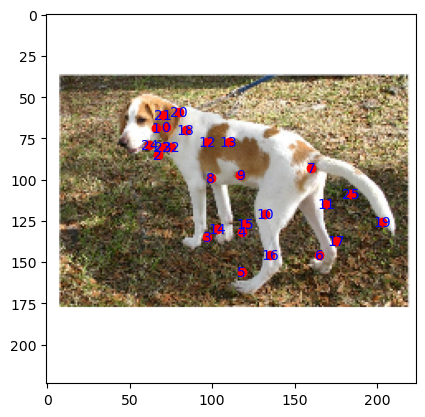

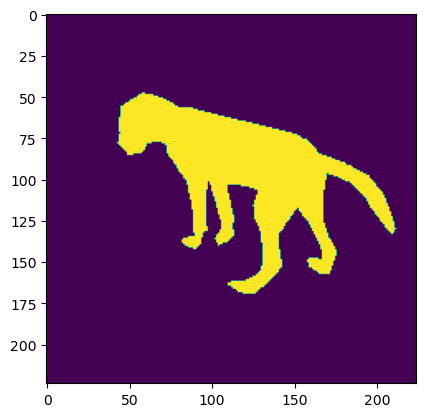

In [10]:
idx = 3
plt.imshow(img_orig.permute(0,2,3,1).cpu().numpy()[idx])

kpts = keypoints.cpu().numpy()[idx]*112+112
# x = 112 + kpts[:,0]
# y = 112 + kpts[:,1]
# plt.scatter(x, y, color="red")

for j, kpt in enumerate(kpts):
    plt.scatter(kpt[0], kpt[1], c='red',)
    plt.text(kpt[0], kpt[1], f'{j}', fontsize=10, color='blue', ha='center', va='center')
plt.show()

plt.imshow(seg.permute(0,2,3,1).cpu().numpy()[idx])
plt.show()

In [11]:
a = np.array([[44, 40, 1], [25, 37, 1], [32, 50, 1], [42, 108, 1], [24, 100, 1], [93, 116, 1], [89, 106, 1], [99, 47, 1], [64, 78, 1], [33, 69, 1], [102, 74, 1], [82, 63, 1], [56, 60, 1], [41, 55, 1], [46, 102, 1], [27, 96, 1], [102, 114, 1], [95, 108, 1], [33, 56, 1], [111, 71, 1], [59, 31, 1], [12, 25, 1], [40, 50, 1], [28, 47, 1], [34, 43, 1], [108, 59, 1]])

In [12]:
a.shape

(26, 3)

In [13]:
keypoints.shape

torch.Size([32, 26, 3])